# Chapter 2 Classification
In the chapter we will using the MNIST dataset,which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.Each image is labeled with the digit it represents.This set has been studied so much that it is often called the "Hello World" of Machine Learning.

In [2]:
>>> from sklearn.datasets import fetch_openml
>>> mnist = fetch_openml('mnist_784', version=1,parser='auto')
>>> mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

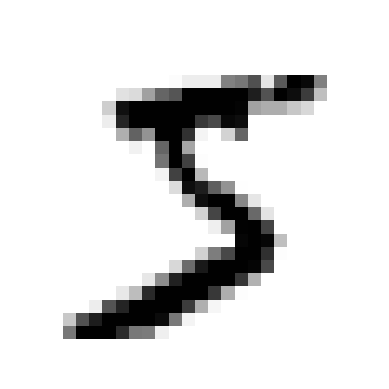

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y[0]

'5'

Note that the label is a string.Most ML algorithms expectt numbers,so let us cast to integer:

In [10]:
import numpy as np
y = y.astype(np.uint8)


You should always create a test set and set it aside before inspecting the data closely.The MNIST dataset is actually already split into a training set(the first 60,000 iamges) and a test set (the last 10,000 images):

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The rows have been randomly reordered in the shuffled dataset. This helps prevent any bias that might arise from the original order of the data, and it ensures that similar instances are not grouped together.

## Training a Binary Classifier
two classes,5 and not-5

In [12]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)


let us create an SDGClassifier and train it on the whole training set:

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

c:\Users\qinlo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measures
Evaluating a classifer is often signicicantly trickier than evaluating a regressor,so we will spend a large part of this chapter on this topic.There are many performacne measures avaiable,so grab another coffee and get ready to learn more new concpts and acronyms!
## Measuring Accuracy Using Cross-Validation

A ggod way to evaluate a model is to use cross-validation,
## Implementing Cross-Validation
Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off the shelf.The following code does roughly the same thing as Scikit-Learn's corss_val_score() function,and it prints the same result:

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

KeyError: "None of [Index([    1,     3,     4,     5,     7,     8,    10,    11,    12,    13,\n       ...\n       59984, 59985, 59987, 59988, 59989, 59991, 59993, 59994, 59996, 59998],\n      dtype='int32', length=40000)] are in the [columns]"